In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
basedir = "/Users/bono/Desktop/gm2FieldAnalysis/MuonConvolution/"

## Get the field

In [5]:
path=basedir + 'field_info/'
sys.path.append(path)
from field_grid import *
from format_field import get_field_df

In [6]:
path=path + 'data/'
# file = "60Hr_Average_Comparison_all_3956_3997_norescut.txt"
file = "60Hr_Average_Comparison_all_3956_3997_norescut_NoAvg.txt"
file = path + file
df_field = get_field_df(file)
df_field.reset_index(inplace=True)
t_min = '2018-04-23 07:52:40'
t_max = '2018-04-23 08:00:30'
mask = (df_field['DateTime'] > t_min) & (df_field['DateTime'] < t_max)
df_field = df_field[mask]
df_field.head()

,DateTime,D,eD,NQ,eNQ,SQ,eSQ,NS,eNS
43201,2018-04-23 07:52:42,841.503,0.12655,0.050098,0.117303,0.212280,0.034566,-1.16997,0.04824
43202,2018-04-23 07:52:44,841.494,0.12655,0.048483,0.117303,0.211474,0.034566,-1.17295,0.04824
43203,2018-04-23 07:52:46,841.520,0.12655,0.031492,0.117303,0.208844,0.034566,-1.16562,0.04824
43204,2018-04-23 07:52:48,841.519,0.12655,0.048759,0.117303,0.208289,0.034566,-1.16674,0.04824
43205,2018-04-23 07:52:50,841.496,0.12655,0.044817,0.117303,0.211356,0.034566,-1.17810,0.04824


In [7]:
start = df_field['DateTime'].min()
end = df_field['DateTime'].max()
print(start)
print(end)

2018-04-23 07:52:42
2018-04-23 08:00:28


/usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


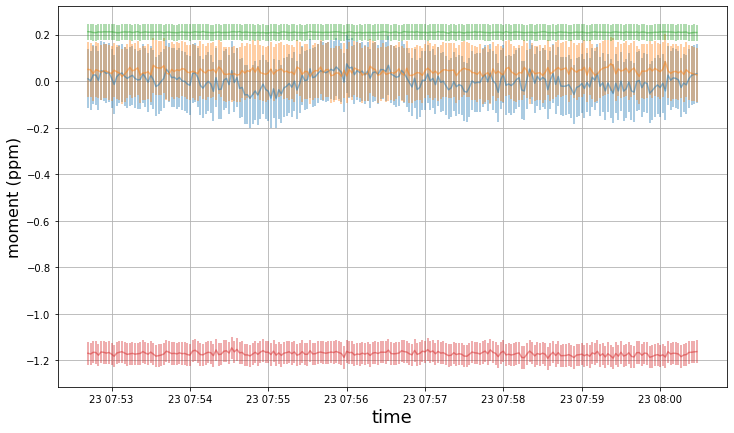

In [8]:
df = df_field.copy()
#for plotting together, subtract the dipole average from the dipole
mean = df['D'].mean()
df['Doff'] = df['D'] - mean
# ctag_mean = df['ctags'].max()
# df['ctags_norm'] = df['ctags']/ctag_mean

#plot the moments together
fig = plt.figure(figsize=(12,7))
plt.errorbar(df['DateTime'], df['Doff'], 
             yerr=df['eD'], label='D (offset)',alpha=0.5)
plt.errorbar(df['DateTime'], df['NQ'], 
             yerr=df['eNQ'], label='NQ',alpha=0.5)
plt.errorbar(df['DateTime'], df['SQ'],
             yerr=df['eSQ'], label='SQ',alpha=0.5)
plt.errorbar(df['DateTime'], df['NS'], 
             yerr=df['eNS'], label='NS',alpha=0.5)
# plt.scatter(df['start_time'], -df['ctags_norm'], 
#             label='negative normalized ctags',alpha=0.5,color='black')

plt.grid()
plt.xlabel('time', fontsize=18)
plt.ylabel('moment (ppm)', fontsize=16)
# plt.legend()

plt.show()

## get the ctags

In [9]:
path = basedir + 'muon_info'
sys.path.append(path)
from database_helper import muon_formatter, time_to_run
#Put the Postgres database info into a dataframe
df_ctag = muon_formatter(start=start,end=end)
df_ctag.head()

start_time            end_time  ctags quad_condition  \
run   subrun                                                                 
15938 166    2018-04-23 07:53:24 2018-04-23 07:53:39  18241      13.1/18.3   
      174    2018-04-23 07:54:25 2018-04-23 07:54:40  18374      13.1/18.3   
      189    2018-04-23 07:56:21 2018-04-23 07:56:26  19600      13.1/18.3   
      197    2018-04-23 07:57:21 2018-04-23 07:57:27  19329      13.1/18.3   
      205    2018-04-23 07:58:23 2018-04-23 07:58:28  19170      13.1/18.3   

             kicker_condition  quad_ok  ctags_ok  losses_ok  fillcuts_ok  \
run   subrun                                                               
15938 166       3.6/2.64/2.76     True      True       True         True   
      174       3.6/2.64/2.76     True      True       True         True   
      189       3.6/2.64/2.76     True      True       True         True   
      197       3.6/2.64/2.76     True      True       True         True   
      205       3.6/2.64/2.76     True      True       True         True   

             field_ok  trolley_period  field_period ctags_loose_ok  \
run   subrun                                                         
15938 166        True             0.0           3.0           True   
      174        True             0.0           3.0           True   
      189        True             0.0           3.0           True   
      197        True             0.0           3.0           True   
      205        True             0.0           3.0           True   

             quad_loose_ok ctags_repeat_ok losses_repeat_ok  \
run   subrun                                                  
15938 166             None            None             None   
      174             None            None             None   
      189             None            None             None   
      197             None            None             None   
      205             None            None             None   

             fillcuts_repeat_ok           poor_time  poor_ctags  
run   subrun                                                     
15938 166                  None 2018-04-23 07:53:26       475.8  
      174                  None 2018-04-23 07:54:26       454.8  
      189                  None 2018-04-23 07:56:26       466.4  
      197                  None 2018-04-23 07:57:26       464.8  
      205                  None 2018-04-23 07:58:26       467.9

In [63]:
# %%timeit
df_total_1 = df_field.copy()
times = df_field["DateTime"].tolist()
l = [time_to_run(t, df_ctag) for t in times]
df_total_1['run'] = [v[0][0] for v in l]
df_total_1['subrun'] = [v[0][1] for v in l]
df_total_1.set_index(['run','subrun'],inplace=True)
df_total_1.head()

DateTime        D       eD        NQ       eNQ  \
run subrun                                                             
-1  -1     2018-04-23 07:52:42  841.503  0.12655  0.050098  0.117303   
    -1     2018-04-23 07:52:44  841.494  0.12655  0.048483  0.117303   
    -1     2018-04-23 07:52:46  841.520  0.12655  0.031492  0.117303   
    -1     2018-04-23 07:52:48  841.519  0.12655  0.048759  0.117303   
    -1     2018-04-23 07:52:50  841.496  0.12655  0.044817  0.117303   

                  SQ       eSQ       NS      eNS  
run subrun                                        
-1  -1      0.212280  0.034566 -1.16997  0.04824  
    -1      0.211474  0.034566 -1.17295  0.04824  
    -1      0.208844  0.034566 -1.16562  0.04824  
    -1      0.208289  0.034566 -1.16674  0.04824  
    -1      0.211356  0.034566 -1.17810  0.04824

DateTime        D       eD        NQ       eNQ  \
run subrun                                                             
-1  -1     2018-04-23 07:52:42  841.503  0.12655  0.050098  0.117303   
    -1     2018-04-23 07:52:44  841.494  0.12655  0.048483  0.117303   
    -1     2018-04-23 07:52:46  841.520  0.12655  0.031492  0.117303   
    -1     2018-04-23 07:52:48  841.519  0.12655  0.048759  0.117303   
    -1     2018-04-23 07:52:50  841.496  0.12655  0.044817  0.117303   

                  SQ       eSQ       NS      eNS  
run subrun                                        
-1  -1      0.212280  0.034566 -1.16997  0.04824  
    -1      0.211474  0.034566 -1.17295  0.04824  
    -1      0.208844  0.034566 -1.16562  0.04824  
    -1      0.208289  0.034566 -1.16674  0.04824  
    -1      0.211356  0.034566 -1.17810  0.04824

In [31]:
import pandasql as ps

sqlcode = '''
select df_field.*
,df_ctag.ctags
,df_ctag.run
,df_ctag.subrun
from df_field
inner join df_ctag 
on df_field.DateTime between df_ctag.start_time and df_ctag.end_time
'''

df_sql = ps.sqldf(sqlcode,locals())
df_sql.set_index(['run','subrun'],inplace=True)
df_sql.head()

DateTime        D       eD        NQ  \
run   subrun                                                           
15938 166     2018-04-23 07:53:24.000000  841.525  0.12655  0.034626   
      166     2018-04-23 07:53:26.000000  841.508  0.12655  0.035054   
      166     2018-04-23 07:53:28.000000  841.489  0.12655  0.040268   
      166     2018-04-23 07:53:30.000000  841.519  0.12655  0.025893   
      166     2018-04-23 07:53:32.000000  841.499  0.12655  0.068080   

                   eNQ        SQ       eSQ       NS      eNS  ctags  
run   subrun                                                         
15938 166     0.117303  0.209951  0.034566 -1.16248  0.04824  18241  
      166     0.117303  0.211295  0.034566 -1.16920  0.04824  18241  
      166     0.117303  0.209994  0.034566 -1.17398  0.04824  18241  
      166     0.117303  0.209533  0.034566 -1.16499  0.04824  18241  
      166     0.117303  0.209399  0.034566 -1.17339  0.04824  18241

In [39]:
times = df_field["DateTime"].tolist()
l = [time_to_run(t, df_ctag) for t in times]
df_field['run'] = [v[0][0] for v in l]
df_field['subrun'] = [v[0][1] for v in l]
df_field.set_index(['run','subrun'],inplace=True)

In [55]:
df_total = pd.merge(df_field, df_ctag, on=['run','subrun'], how='inner')
# print(df_total['start_time'].head(10))
# print(df_total['DateTime'].head(10))
# print(df_total['end_time'].head(10))
# print(df_total['ctags'].head(100))
df_total.head()

DateTime        D       eD        NQ       eNQ  \
run   subrun                                                             
15938 166    2018-04-23 07:53:26  841.508  0.12655  0.035054  0.117303   
      166    2018-04-23 07:53:28  841.489  0.12655  0.040268  0.117303   
      166    2018-04-23 07:53:30  841.519  0.12655  0.025893  0.117303   
      166    2018-04-23 07:53:32  841.499  0.12655  0.068080  0.117303   
      166    2018-04-23 07:53:34  841.470  0.12655  0.058700  0.117303   

                    SQ       eSQ       NS      eNS          start_time  ...  \
run   subrun                                                            ...   
15938 166     0.211295  0.034566 -1.16920  0.04824 2018-04-23 07:53:24  ...   
      166     0.209994  0.034566 -1.17398  0.04824 2018-04-23 07:53:24  ...   
      166     0.209533  0.034566 -1.16499  0.04824 2018-04-23 07:53:24  ...   
      166     0.209399  0.034566 -1.17339  0.04824 2018-04-23 07:53:24  ...   
      166     0.210697  0.034566 -1.18222  0.04824 2018-04-23 07:53:24  ...   

             field_ok  trolley_period field_period ctags_loose_ok  \
run   subrun                                                        
15938 166        True             0.0          3.0           True   
      166        True             0.0          3.0           True   
      166        True             0.0          3.0           True   
      166        True             0.0          3.0           True   
      166        True             0.0          3.0           True   

              quad_loose_ok  ctags_repeat_ok  losses_repeat_ok  \
run   subrun                                                     
15938 166              None             None              None   
      166              None             None              None   
      166              None             None              None   
      166              None             None              None   
      166              None             None              None   

              fillcuts_repeat_ok           poor_time  poor_ctags  
run   subrun                                                      
15938 166                   None 2018-04-23 07:53:26       475.8  
      166                   None 2018-04-23 07:53:26       475.8  
      166                   None 2018-04-23 07:53:26       475.8  
      166                   None 2018-04-23 07:53:26       475.8  
      166                   None 2018-04-23 07:53:26       475.8  

[5 rows x 28 columns]

In [54]:
(df_total['D'] - df_sql['D']).mean()

-0.0010849673202632747

In [60]:
df_sql['DateTime'] =  pd.to_datetime(df_sql['DateTime'])

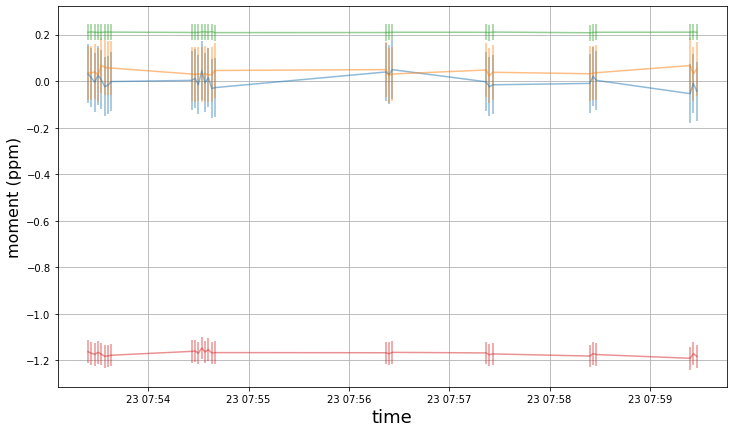

In [61]:
df = df_sql.copy()
#for plotting together, subtract the dipole average from the dipole
mean = df['D'].mean()
df['Doff'] = df['D'] - mean
# ctag_mean = df['ctags'].max()
# df['ctags_norm'] = df['ctags']/ctag_mean

#plot the moments together
fig = plt.figure(figsize=(12,7))
plt.errorbar(df['DateTime'], df['Doff'], 
             yerr=df['eD'], label='D (offset)',alpha=0.5)
plt.errorbar(df['DateTime'], df['NQ'], 
             yerr=df['eNQ'], label='NQ',alpha=0.5)
plt.errorbar(df['DateTime'], df['SQ'],
             yerr=df['eSQ'], label='SQ',alpha=0.5)
plt.errorbar(df['DateTime'], df['NS'], 
             yerr=df['eNS'], label='NS',alpha=0.5)
# plt.scatter(df['start_time'], -df['ctags_norm'], 
#             label='negative normalized ctags',alpha=0.5,color='black')

plt.grid()
plt.xlabel('time', fontsize=18)
plt.ylabel('moment (ppm)', fontsize=16)
# plt.legend()

plt.show()

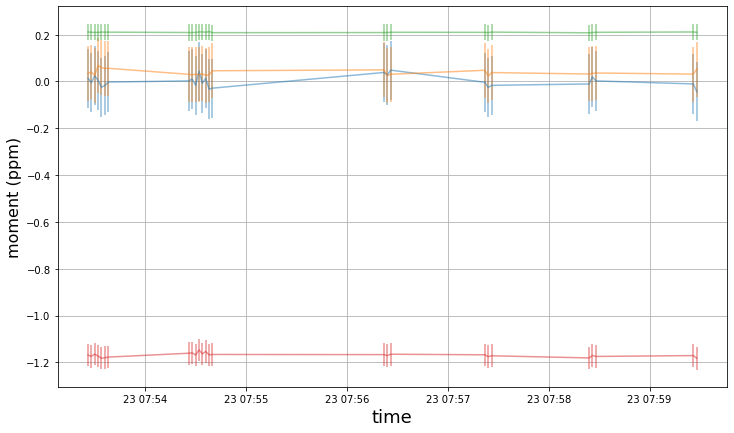

In [62]:
df = df_total.copy()
#for plotting together, subtract the dipole average from the dipole
mean = df['D'].mean()
df['Doff'] = df['D'] - mean
# ctag_mean = df['ctags'].max()
# df['ctags_norm'] = df['ctags']/ctag_mean

#plot the moments together
fig = plt.figure(figsize=(12,7))
plt.errorbar(df['DateTime'], df['Doff'], 
             yerr=df['eD'], label='D (offset)',alpha=0.5)
plt.errorbar(df['DateTime'], df['NQ'], 
             yerr=df['eNQ'], label='NQ',alpha=0.5)
plt.errorbar(df['DateTime'], df['SQ'],
             yerr=df['eSQ'], label='SQ',alpha=0.5)
plt.errorbar(df['DateTime'], df['NS'], 
             yerr=df['eNS'], label='NS',alpha=0.5)
# plt.scatter(df['start_time'], -df['ctags_norm'], 
#             label='negative normalized ctags',alpha=0.5,color='black')

plt.grid()
plt.xlabel('time', fontsize=18)
plt.ylabel('moment (ppm)', fontsize=16)
# plt.legend()

plt.show()

In [ ]:
path = basedir + 'synthesis'
sys.path.append(path)
from combine_data_products import field_ctag_dqm

In [ ]:
df_test = field_ctag_dqm(start=t_min,end=t_max)

In [ ]:
df = df_test.copy()
#for plotting together, subtract the dipole average from the dipole
mean = df['D'].mean()
df['Doff'] = df['D'] - mean
# ctag_mean = df['ctags'].max()
# df['ctags_norm'] = df['ctags']/ctag_mean

#plot the moments together
fig = plt.figure(figsize=(12,7))
plt.errorbar(df['DateTime'], df['Doff'], 
             yerr=df['eD'], label='D (offset)',alpha=0.5)
plt.errorbar(df['DateTime'], df['NQ'], 
             yerr=df['eNQ'], label='NQ',alpha=0.5)
plt.errorbar(df['DateTime'], df['SQ'],
             yerr=df['eSQ'], label='SQ',alpha=0.5)
plt.errorbar(df['DateTime'], df['NS'], 
             yerr=df['eNS'], label='NS',alpha=0.5)
# plt.scatter(df['start_time'], -df['ctags_norm'], 
#             label='negative normalized ctags',alpha=0.5,color='black')

plt.grid()
plt.xlabel('time', fontsize=18)
plt.ylabel('moment (ppm)', fontsize=16)
# plt.legend()

plt.show()

# Now do a test to see how fast the new field + odb combing function can be

In [95]:
path=basedir + 'field_info/'
sys.path.append(path)
from field_grid import *
from format_field import get_field_df

In [96]:
path=path + 'data/'
file = "60Hr_Average_Comparison_all_3956_3997_norescut_NoAvg.txt"
file = path + file
df_field = get_field_df(file)
df_field.reset_index(inplace=True)
df_field

,DateTime,D,eD,NQ,eNQ,SQ,eSQ,NS,eNS
0,2018-04-22 07:52:40,841.744,0.046244,0.060869,0.087027,0.163640,0.028346,-1.14625,0.028019
1,2018-04-22 07:52:42,841.765,0.046244,0.073984,0.087027,0.162312,0.028346,-1.14114,0.028019
2,2018-04-22 07:52:44,841.770,0.046244,0.045627,0.087027,0.161684,0.028346,-1.14125,0.028019
3,2018-04-22 07:52:46,841.767,0.046244,0.085345,0.087027,0.162837,0.028346,-1.14056,0.028019
4,2018-04-22 07:52:48,841.793,0.046244,0.058946,0.087027,0.164271,0.028346,-1.13227,0.028019
5,2018-04-22 07:52:50,841.771,0.046244,0.058518,0.087027,0.162576,0.028346,-1.14043,0.028019
6,2018-04-22 07:52:52,841.769,0.046244,0.053371,0.087027,0.161885,0.028346,-1.14076,0.028019
7,2018-04-22 07:52:54,841.759,0.046244,0.070093,0.087027,0.161470,0.028346,-1.14408,0.028019
8,2018-04-22 07:52:56,841.761,0.046244,0.062687,0.087027,0.162551,0.028346,-1.14491,0.028019
9,2018-04-22 07:52:58,841.780,0.046244,0.061747,0.087027,0.162484,0.028346,-1.13811,0.028019


In [97]:
start = df_field['DateTime'].min()
end = df_field['DateTime'].max()
print(start)
print(end)

2018-04-22 07:52:40
2018-04-25 07:20:30


In [98]:
path = basedir + 'muon_info'
sys.path.append(path)
from database_helper import muon_formatter, time_to_run
#Put the Postgres database info into a dataframe
df_ctag = muon_formatter(start=start,end=end)
df_ctag

start_time            end_time  ctags quad_condition  \
run   subrun                                                                 
15921 0      2018-04-22 13:14:00 2018-04-22 13:14:34      0      12.1/18.0   
      5      2018-04-22 13:15:20 2018-04-22 13:15:29      0      13.1/18.0   
      11     2018-04-22 13:16:23 2018-04-22 13:16:31      0      13.1/18.0   
      17     2018-04-22 13:17:24 2018-04-22 13:17:28  20405      13.1/18.3   
      25     2018-04-22 13:18:24 2018-04-22 13:18:29  20205      13.1/18.3   
...                          ...                 ...    ...            ...   
15991 117    2018-04-25 01:56:18 2018-04-25 01:56:33  20753      13.1/18.3   
      125    2018-04-25 01:57:17 2018-04-25 01:57:33  20879      13.1/18.3   
      133    2018-04-25 01:58:17 2018-04-25 01:58:34  10332      13.1/18.3   
      141    2018-04-25 01:59:19 2018-04-25 01:59:34  20257      13.1/18.3   
      149    2018-04-25 02:00:18 2018-04-25 02:00:34  20184      13.1/18.3   

             kicker_condition  quad_ok  ctags_ok  losses_ok  fillcuts_ok  \
run   subrun                                                               
15921 0         3.6/2.64/2.76    False     False      False        False   
      5         3.6/2.64/2.76    False     False      False        False   
      11        3.6/2.64/2.76    False     False      False        False   
      17        3.6/2.64/2.76     True      True       True         True   
      25        3.6/2.64/2.76     True      True       True         True   
...                       ...      ...       ...        ...          ...   
15991 117       3.6/2.64/2.76     True      True       True         True   
      125       3.6/2.64/2.76     True      True       True         True   
      133       3.6/2.64/2.76     True     False       True        False   
      141       3.6/2.64/2.76     True      True       True         True   
      149       3.6/2.64/2.76     True      True       True         True   

             field_ok  trolley_period  field_period ctags_loose_ok  \
run   subrun                                                         
15921 0          True             0.0           1.0          False   
      5          True             0.0           1.0          False   
      11         True             0.0           1.0          False   
      17         True             0.0           1.0           True   
      25         True             0.0           1.0           True   
...               ...             ...           ...            ...   
15991 117        True             0.0          11.0           True   
      125        True             0.0          11.0           True   
      133        True             0.0          11.0          False   
      141        True             0.0          11.0           True   
      149        True             0.0          11.0           True   

             quad_loose_ok ctags_repeat_ok losses_repeat_ok  \
run   subrun                                                  
15921 0               None            None             None   
      5               None            None             None   
      11              None            None             None   
      17              None            None             None   
      25              None            None             None   
...                    ...             ...              ...   
15991 117             None            None             None   
      125             None            None             None   
      133             None            None             None   
      141             None            None             None   
      149             None            None             None   

             fillcuts_repeat_ok           poor_time  poor_ctags  
run   subrun                                                     
15921 0                    None 2018-04-22 13:14:26       231.5  
      5                    None 2018-04-22 13:15:26         0.0  
      11               

In [99]:
import pandasql as ps
def sql_join(df_field,df_ctag):
    """
        Returns a dataframe that joins a field df and an ODB df
        that is indexed by run and subrun number.
        
        It is a faster way, compaired to .apply and list comprehention, 
        to combine dataframes based off the criteria of one having a 
        value within a range of values from the other
        
        
        WARNING: THIS FUNCTION ASSUMES THE TWO DFS ARE IN THE SAME TIMEZONE
    """

    #define the sql command to join the two dataframes
    sqlcode = '''
    select df_field.*
    ,df_ctag.ctags
    ,df_ctag.run
    ,df_ctag.subrun
    ,df_ctag.start_time
    ,df_ctag.end_time
    ,df_ctag.poor_ctags
    from df_field
    inner join df_ctag 
    on df_field.DateTime between df_ctag.start_time and df_ctag.end_time
    '''
    #get the joined dataframe
    df_sql = ps.sqldf(sqlcode,locals())
    #index by run and subrun
    df_sql.set_index(['run','subrun'],inplace=True)
    #reduce the precision of the timestamp
    df_sql['DateTime'] = df_sql['DateTime'].astype('datetime64[s]')
    df_sql['start_time'] = df_sql['start_time'].astype('datetime64[s]')
    df_sql['end_time'] = df_sql['end_time'].astype('datetime64[s]')
    return df_sql
df_sql = sql_join(df_field,df_ctag)
df_sql

DateTime        D        eD        NQ       eNQ  \
run   subrun                                                              
15921 0      2018-04-22 13:14:00  841.789  0.079075  0.019905  0.096987   
      0      2018-04-22 13:14:02  841.735  0.079075  0.032789  0.096987   
      0      2018-04-22 13:14:04  841.706  0.079075  0.060667  0.096987   
      0      2018-04-22 13:14:06  841.685  0.079075  0.054613  0.096987   
      0      2018-04-22 13:14:08  841.714  0.079075  0.044995  0.096987   
...                          ...      ...       ...       ...       ...   
15991 149    2018-04-25 02:00:26  840.901  0.078747 -0.172706  0.096989   
      149    2018-04-25 02:00:28  840.902  0.078747 -0.205098  0.096989   
      149    2018-04-25 02:00:30  840.926  0.078747 -0.189034  0.096989   
      149    2018-04-25 02:00:32  840.913  0.078747 -0.186287  0.096989   
      149    2018-04-25 02:00:34  840.950  0.078747 -0.208817  0.096989   

                    SQ       eSQ       NS       eNS  ctags  
run   subrun                                                
15921 0       0.176251  0.030298 -1.13956  0.035181      0  
      0       0.169870  0.030298 -1.15897  0.035181      0  
      0       0.175534  0.030298 -1.16613  0.035181      0  
      0       0.173558  0.030298 -1.17401  0.035181      0  
      0       0.173786  0.030298 -1.16228  0.035181      0  
...                ...       ...      ...       ...    ...  
15991 149     0.355251  0.030746 -1.26692  0.035651  20184  
      149     0.355583  0.030746 -1.26468  0.035651  20184  
      149     0.352685  0.030746 -1.25626  0.035651  20184  
      149     0.355249  0.030746 -1.26225  0.035651  20184  
      149     0.354756  0.030746 -1.25181  0.035651  20184  

[23645 rows x 10 columns]

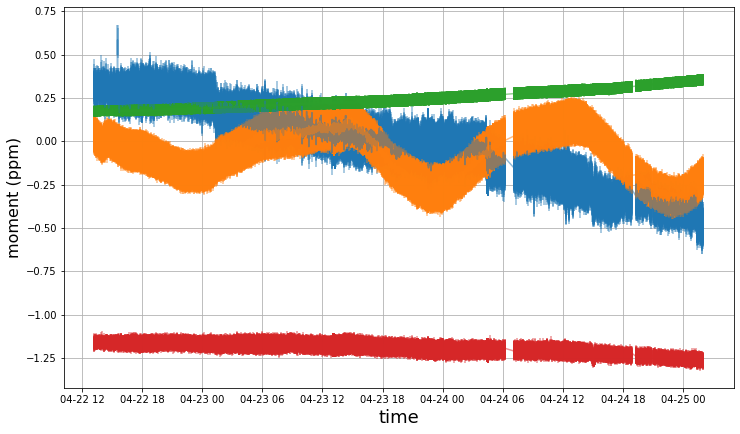

In [100]:
df = df_sql.copy()
#for plotting together, subtract the dipole average from the dipole
mean = df['D'].mean()
df['Doff'] = df['D'] - mean
# ctag_mean = df['ctags'].max()
# df['ctags_norm'] = df['ctags']/ctag_mean

#plot the moments together
fig = plt.figure(figsize=(12,7))
plt.errorbar(df['DateTime'], df['Doff'], 
             yerr=df['eD'], label='D (offset)',alpha=0.5)
plt.errorbar(df['DateTime'], df['NQ'], 
             yerr=df['eNQ'], label='NQ',alpha=0.5)
plt.errorbar(df['DateTime'], df['SQ'],
             yerr=df['eSQ'], label='SQ',alpha=0.5)
plt.errorbar(df['DateTime'], df['NS'], 
             yerr=df['eNS'], label='NS',alpha=0.5)
# plt.scatter(df['start_time'], -df['ctags_norm'], 
#             label='negative normalized ctags',alpha=0.5,color='black')

plt.grid()
plt.xlabel('time', fontsize=18)
plt.ylabel('moment (ppm)', fontsize=16)
# plt.legend()

plt.show()

# Now shift the time of the field

In [101]:
df_field['DateTime'] = df_field['DateTime'].dt.tz_localize('utc').dt.tz_convert('US/Central')


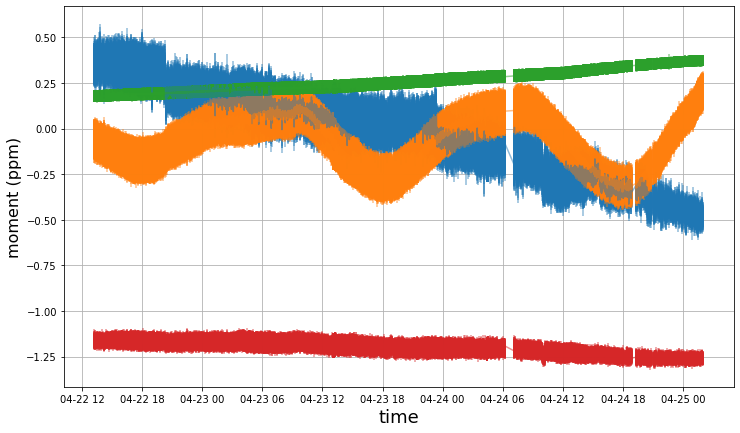

In [102]:
df_sql = sql_join(df_field,df_ctag)
df_sql
df = df_sql.copy()
#for plotting together, subtract the dipole average from the dipole
mean = df['D'].mean()
df['Doff'] = df['D'] - mean
# ctag_mean = df['ctags'].max()
# df['ctags_norm'] = df['ctags']/ctag_mean

#plot the moments together
fig = plt.figure(figsize=(12,7))
plt.errorbar(df['DateTime'], df['Doff'], 
             yerr=df['eD'], label='D (offset)',alpha=0.5)
plt.errorbar(df['DateTime'], df['NQ'], 
             yerr=df['eNQ'], label='NQ',alpha=0.5)
plt.errorbar(df['DateTime'], df['SQ'],
             yerr=df['eSQ'], label='SQ',alpha=0.5)
plt.errorbar(df['DateTime'], df['NS'], 
             yerr=df['eNS'], label='NS',alpha=0.5)
# plt.scatter(df['start_time'], -df['ctags_norm'], 
#             label='negative normalized ctags',alpha=0.5,color='black')

plt.grid()
plt.xlabel('time', fontsize=18)
plt.ylabel('moment (ppm)', fontsize=16)
# plt.legend()

plt.show()